## Importación de librerías

In [1]:
import os 
os.chdir(os.path.dirname(os.getcwd())) # Change working directory to parent directory

In [2]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from test_harness.datasets.dataset import Dataset
from test_harness.experiments._1_baseline_experiment import BaselineExperiment
from test_harness.experiments._2_response_uncertainty_experiment import UncertaintyKSExperiment
from test_harness.experiments._3_margin_uncertainty_experiment import UncertaintyX2Experiment
from test_harness.experiments._4_margin_threshold_experiment import MarginThresholdExperiment
from test_harness.experiments._5_topline_experiment import ToplineExperiment

from test_harness.utils.utils import (
    plot_experiment_error,
    plot_multiple_experiments,
    aggregate_experiment_metrics,
    plot_KS_drift_distributions,
    plot_XS_drift_margin_distributions
)

import matplotlib.pyplot as plt

%matplotlib inline

## Preparación de los experimentos

In [3]:
def define_run_exps(model, param_grid, dataset, delete_csv=False):

    exps = []

    # baseline experiment
    baseline = BaselineExperiment(model=model, dataset=dataset, param_grid=param_grid, delete_csv=delete_csv)
    # print("Running baseline experiment")
    baseline.run()
    exps.append(baseline)

    # response uncertainty experiment
    uncertainty_ks = UncertaintyKSExperiment(
        model=model,
        dataset=dataset,
        param_grid=param_grid,
        k=5,
        significance_thresh=0.001,
        delete_csv=delete_csv
    )
    # print("Running response uncertainty experiment")
    uncertainty_ks.run()
    exps.append(uncertainty_ks)
    
    # margin uncertainty experiment
    uncertainty_x2 = UncertaintyX2Experiment(
        model=model,
        dataset=dataset,
        param_grid=param_grid,
        k=5,
        significance_thresh=0.01,
        margin_width=0.2,
        delete_csv=delete_csv
    )
    # print("Running margin uncertainty experiment")
    uncertainty_x2.run()
    exps.append(uncertainty_x2)
    
    # margin threshold experiment (sensitivity = 0.5)
    margin_threshold_1 = MarginThresholdExperiment(
        model=model,
        dataset=dataset,
        param_grid=param_grid,
        k=5,
        margin_width=0.2,
        sensitivity=0.5,
        delete_csv=delete_csv
    )
    # print("Running margin threshold experiment; sensitivity=0.5")
    margin_threshold_1.run()
    exps.append(margin_threshold_1)

    # margin threshold experiment (sensitivity = 1)
    margin_threshold_2 = MarginThresholdExperiment(
        model=model,
        dataset=dataset,
        param_grid=param_grid,
        k=5,
        margin_width=0.2,
        sensitivity=1,
        delete_csv=delete_csv
    )
    # print("Running margin threshold experiment; sensitivity=1")
    margin_threshold_2.run()
    exps.append(margin_threshold_2)

    # topline experiment
    topline = ToplineExperiment(
        model=model,
        dataset=dataset,
        k=5,
        param_grid=param_grid,
        delete_csv=delete_csv
    )
    # print("Running topline experiment")
    topline.run()
    exps.append(topline)
    
    return exps

## Carga de datos y ejecución de experimentos

### Mixed - abrupto

In [4]:
# Load data
change_points = [10000]

column_mapping = {
    "target": "target",
    "int_features": ["v", "w"],
    "float_features": ["x", "y"],
}

dataset_mixed_abr = pd.read_csv("./datasets/_1_data_mixed_abrupto.csv")
dataset_mixed_abr['v'].replace({True: 1, False: 0}, inplace = True)
dataset_mixed_abr['w'].replace({True: 1, False: 0}, inplace = True)

model = RandomForestClassifier(n_estimators=5, random_state=42, max_depth=5)
param_grid = {"clf__n_estimators": [5], "clf__max_depth": [5]}

Running experiments with window size = 500


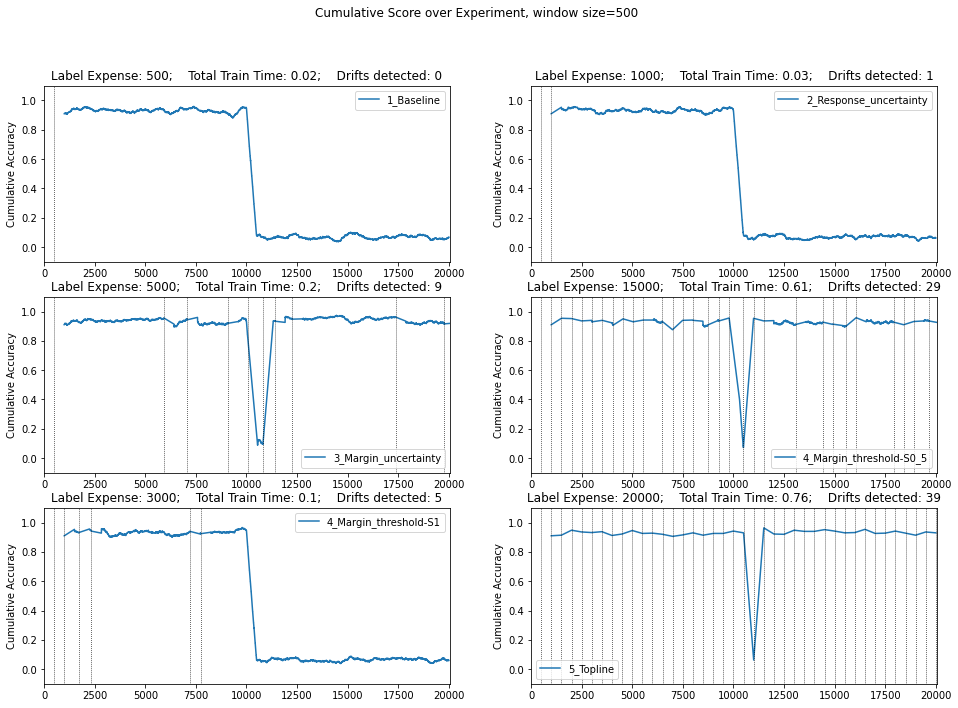

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.02,0.025,0,0,0,0,0.066000,0.00
2_Response_uncertainty,0.03,0.050,1,2,1,2,0.062000,0.00
3_Margin_uncertainty,0.20,0.250,9,2,9,2,0.922018,0.00
4_Margin_threshold-S0_5,0.61,0.750,29,1,29,1,0.923513,0.00
4_Margin_threshold-S1,0.10,0.150,5,2,5,2,0.060000,0.00
5_Topline,0.76,1.000,39,1,38,0,0.930000,0.05


Running experiments with window size = 1500


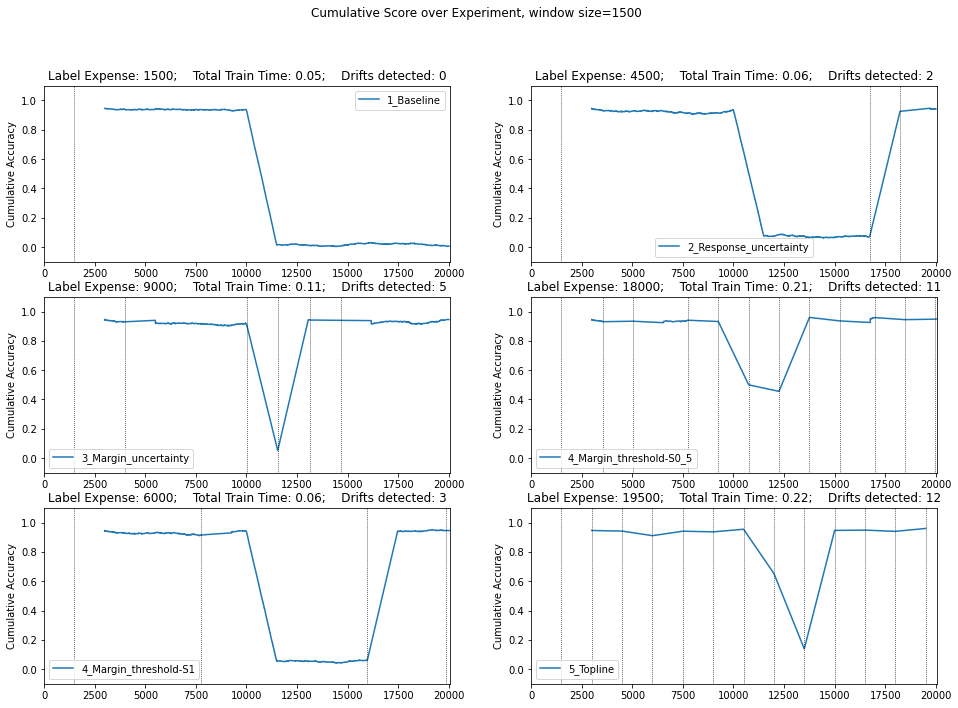

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.05,0.075,0,0,0,0,0.005900,0.000000
2_Response_uncertainty,0.06,0.225,2,3,2,3,0.941333,0.000000
3_Margin_uncertainty,0.11,0.450,5,2,4,1,0.945333,0.285714
4_Margin_threshold-S0_5,0.21,0.900,11,1,10,0,1.000000,0.166667
4_Margin_threshold-S1,0.06,0.300,3,2,3,2,0.944785,0.000000
5_Topline,0.22,0.975,12,1,11,0,0.960000,0.153846


Running experiments with window size = 2500


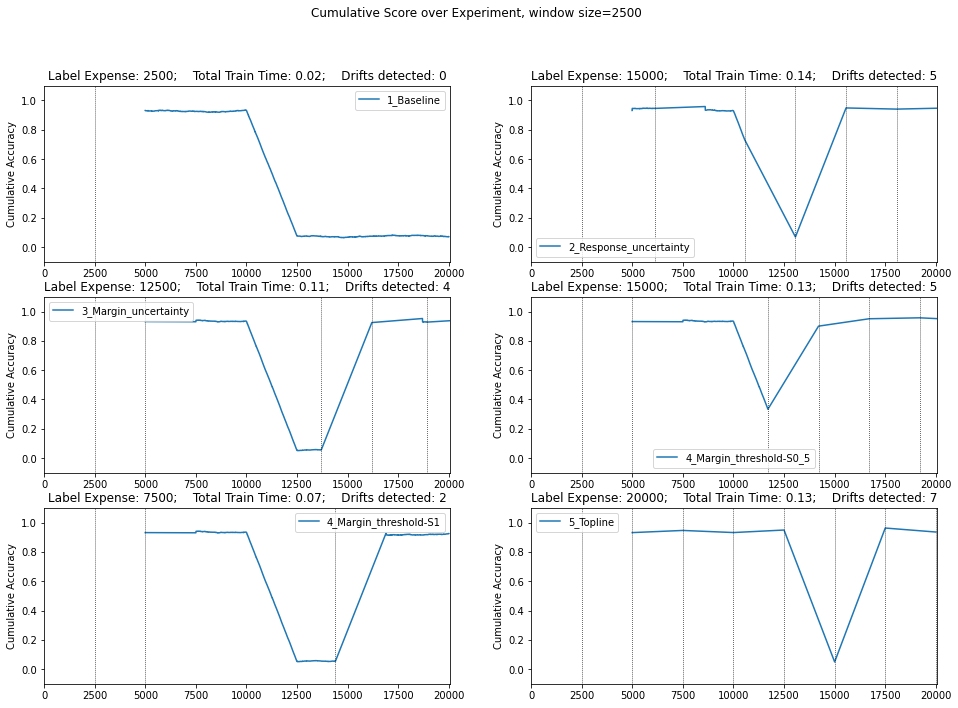

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.02,0.125,0,0,0,0,0.070800,0.000000
2_Response_uncertainty,0.14,0.750,5,2,4,1,0.948837,0.285714
3_Margin_uncertainty,0.11,0.625,4,2,4,2,0.949153,0.000000
4_Margin_threshold-S0_5,0.13,0.750,5,1,5,1,0.940806,0.000000
4_Margin_threshold-S1,0.07,0.375,2,2,2,2,0.924800,0.000000
5_Topline,0.13,1.000,7,1,6,0,0.935600,0.250000


Running experiments with window size = 3500


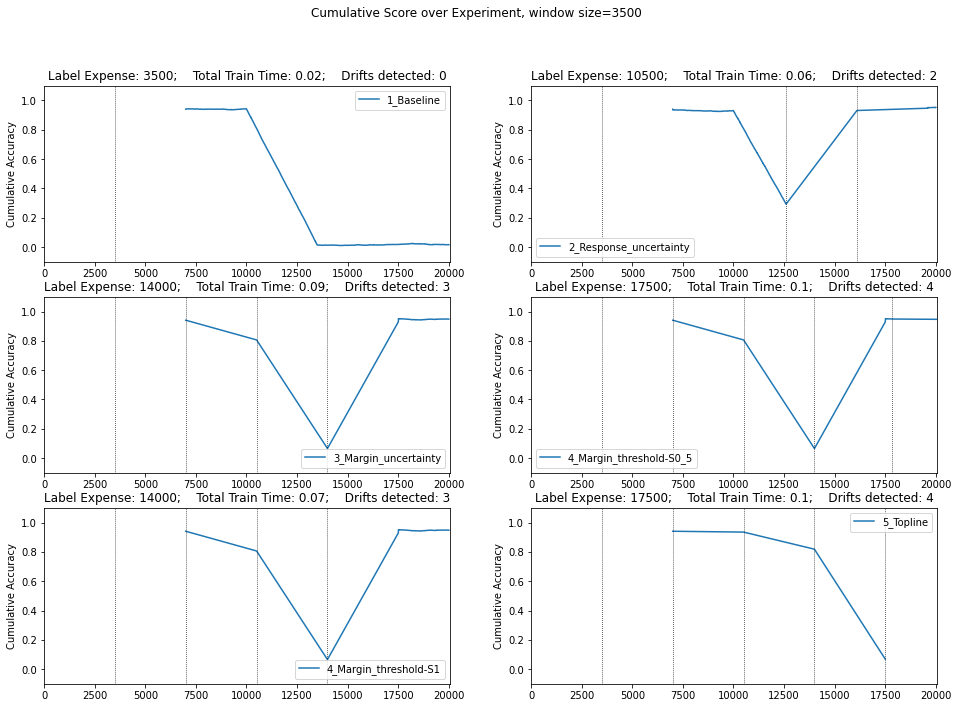

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.02,0.175,0,0,0,0,0.015957,0.0
2_Response_uncertainty,0.06,0.525,2,2,1,1,0.952871,0.5
3_Margin_uncertainty,0.09,0.700,3,1,2,0,0.948300,0.5
4_Margin_threshold-S0_5,0.10,0.875,4,1,3,0,0.945808,0.4
4_Margin_threshold-S1,0.07,0.700,3,1,2,0,0.948300,0.5
5_Topline,0.10,0.875,4,1,3,0,0.068571,0.4


In [5]:
# Run experiments
delete_csv=True
for size_w in [500, 1500, 2500, 3500]:
    # Define dataset
    name_ds = "_1_data_mixed_abrupto"
    dataset_1 = Dataset(name_ds, full_df=dataset_mixed_abr, column_mapping=column_mapping, window_size=size_w)
    # Run experiments
    print(f"Running experiments with window size = {dataset_1.window_size}")
    exps = define_run_exps(model, param_grid, dataset_1, delete_csv=delete_csv)
    delete_csv=False
    #Plot results
    fig, axs = plt.subplots(ncols=2, nrows=3, figsize = (16,11))
    axs = axs.flatten()
    i = 0
    for exp in exps:
        plot_experiment_error(exp, show_trainings=True, ax=axs[i])
        i+=1
    fig.suptitle(f"Cumulative Score over Experiment, window size={dataset_1.window_size}")
    plt.show()
    #plot_multiple_experiments(exps, change_points)
    display(aggregate_experiment_metrics(exps))

##### Inspección visual de resultados

Visualización de la distribución en las zonas detectadas como drift en Exp 2:


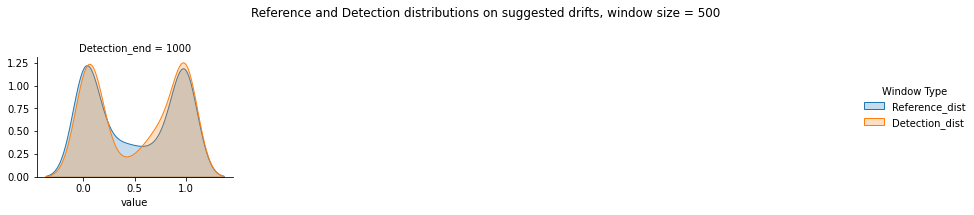

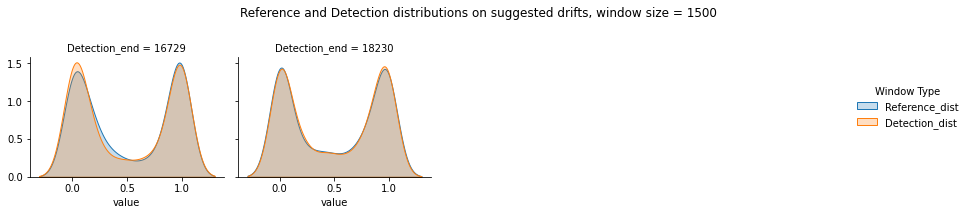

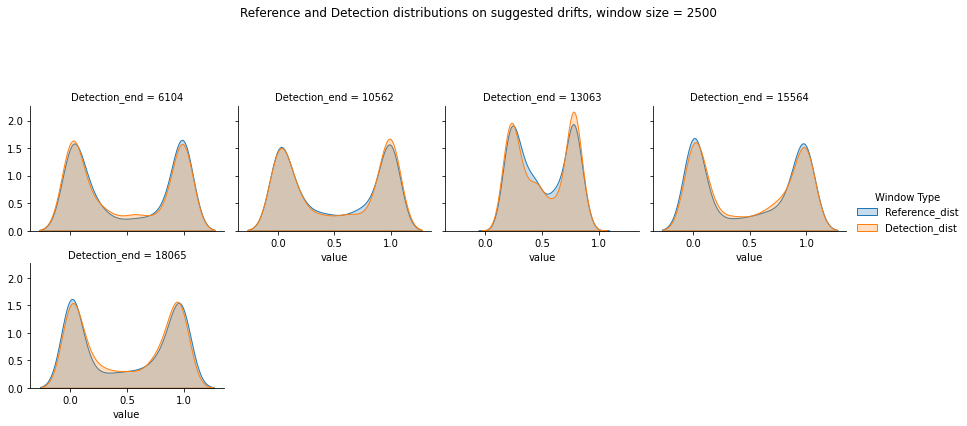

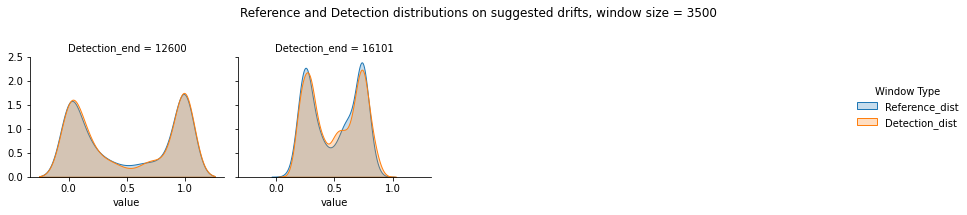

In [6]:
results_KS = pd.read_csv("./results/_1_data_mixed_abrupto_2_Response_uncertainty_results.csv", sep=",")

print("Visualización de la distribución en las zonas detectadas como drift en Exp 2:")
plot_KS_drift_distributions(results_KS,[500, 1500, 2500, 3500])

Visualización de la distribución del margen en las zonas detectadas como drift en Exp 3:


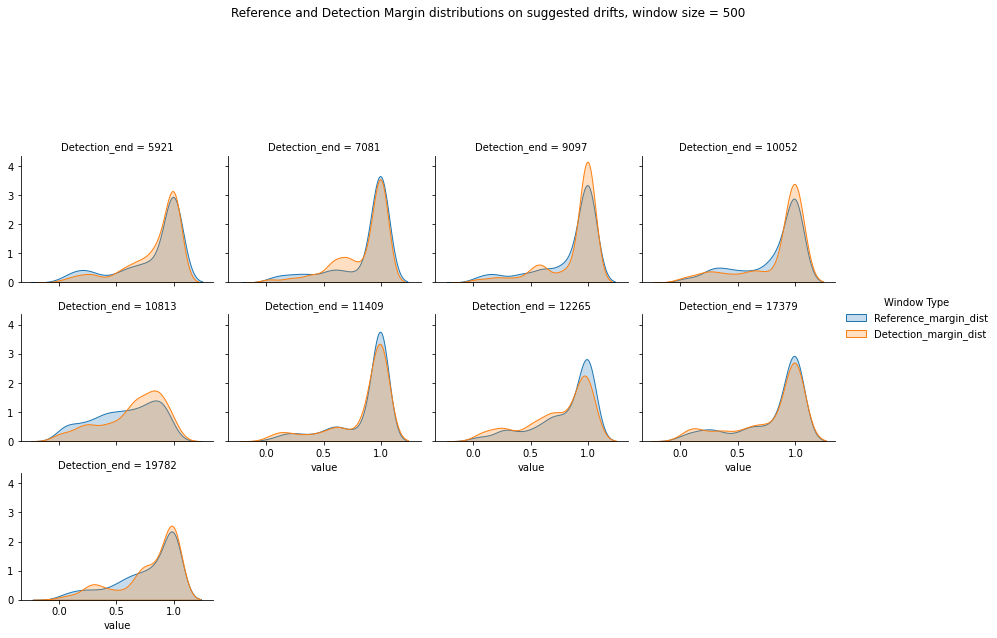

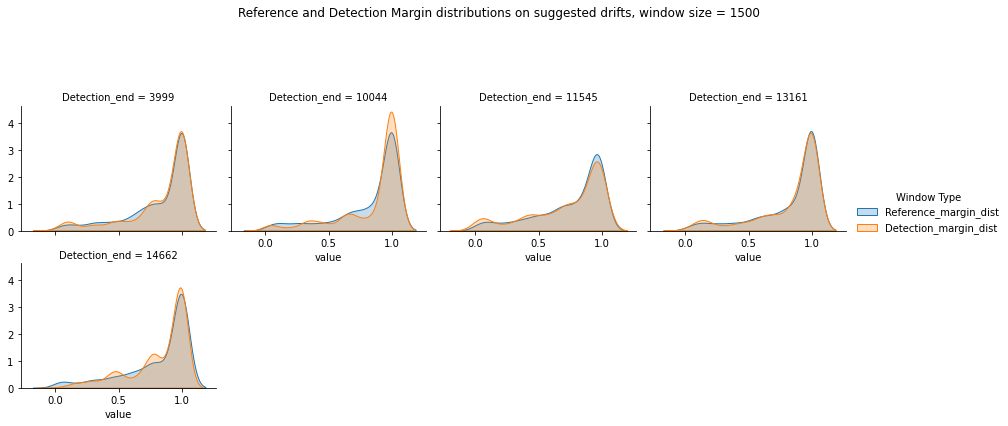

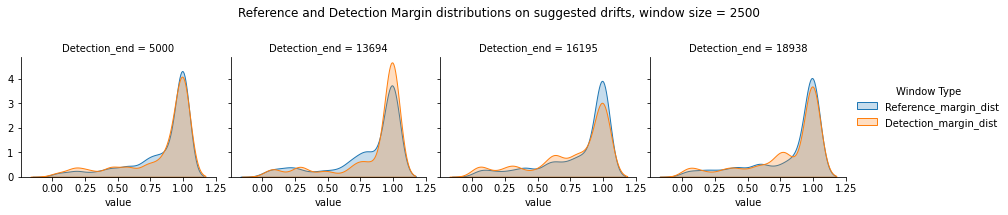

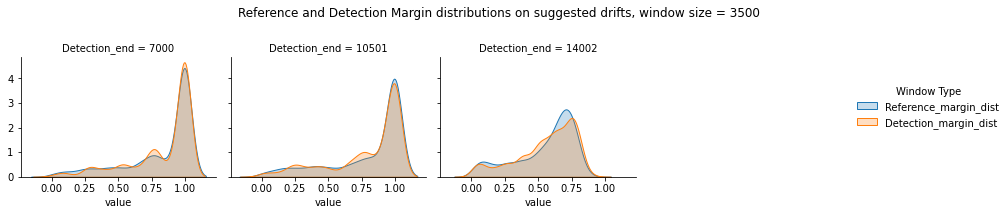

In [7]:
results_XS = pd.read_csv("./results/_1_data_mixed_abrupto_3_Margin_uncertainty_results.csv", sep=",", low_memory=False)

print("Visualización de la distribución del margen en las zonas detectadas como drift en Exp 3:")
plot_XS_drift_margin_distributions(results_XS, [500, 1500, 2500, 3500])

### Mixed - recurrente

In [8]:
# Load data
change_points = [5000,10000,15000]

column_mapping = {
    "target": "target",
    "int_features": ["v", "w"],
    "float_features": ["x", "y"],
}

dataset_mixed_rec = pd.read_csv("./datasets/_2_data_mixed_recurrente.csv")
dataset_mixed_rec['v'].replace({True: 1, False: 0}, inplace = True)
dataset_mixed_rec['w'].replace({True: 1, False: 0}, inplace = True)

model = RandomForestClassifier(n_estimators=5, random_state=42, max_depth=5)
param_grid = {"clf__n_estimators": [5], "clf__max_depth": [5]}

Running experiments with window size = 500


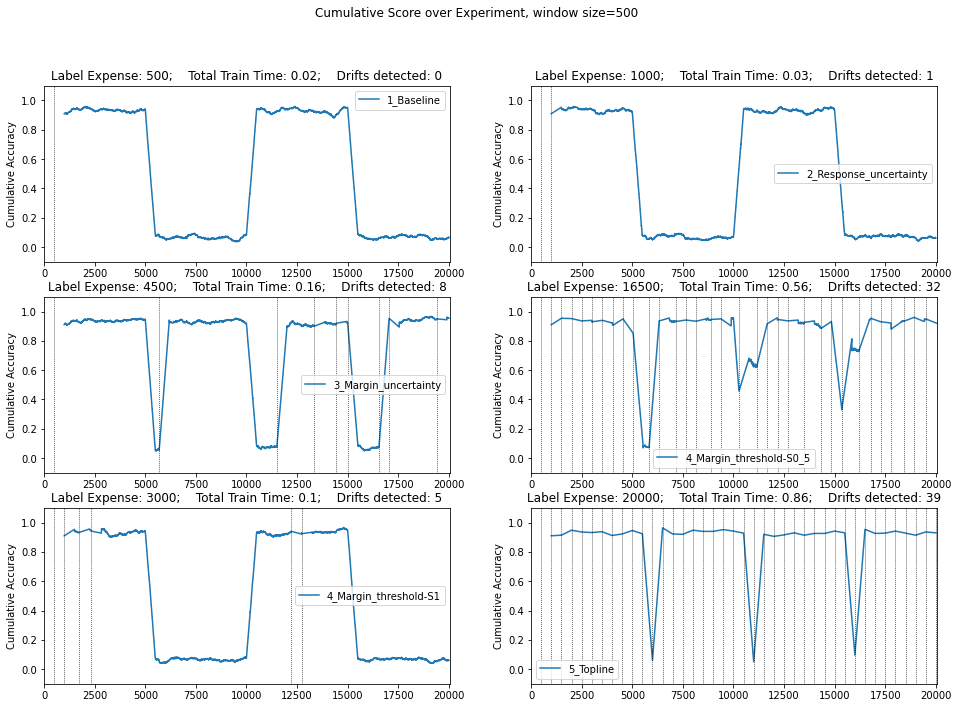

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.02,0.025,0,0,0,0,0.066000,0.000000
2_Response_uncertainty,0.03,0.050,1,5,1,5,0.062000,0.000000
3_Margin_uncertainty,0.16,0.225,8,4,8,4,0.954000,0.000000
4_Margin_threshold-S0_5,0.56,0.825,32,7,31,6,0.920259,0.051282
4_Margin_threshold-S1,0.10,0.150,5,5,5,5,0.060000,0.000000
5_Topline,0.86,1.000,39,1,38,0,0.930000,0.050000


Running experiments with window size = 1500


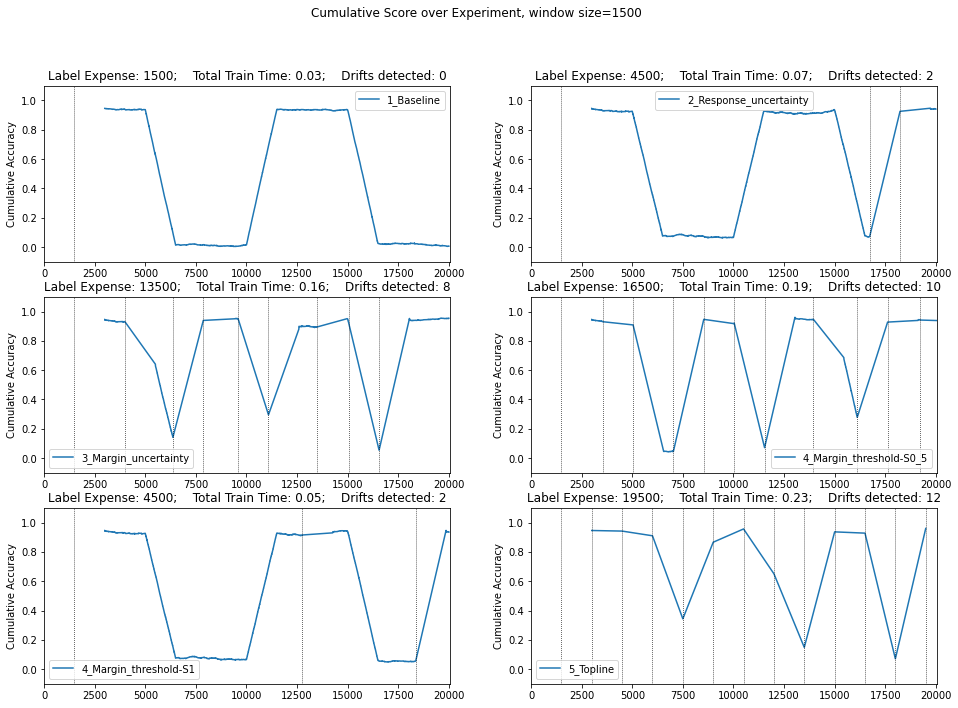

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.03,0.075,0,0,0,0,0.005900,0.000000
2_Response_uncertainty,0.07,0.225,2,6,2,6,0.941333,0.000000
3_Margin_uncertainty,0.16,0.675,8,4,6,2,0.954000,0.333333
4_Margin_threshold-S0_5,0.19,0.825,10,3,9,2,0.935980,0.153846
4_Margin_threshold-S1,0.05,0.225,2,5,2,5,0.935333,0.000000
5_Topline,0.23,0.975,12,3,9,0,0.960000,0.400000


Running experiments with window size = 2500


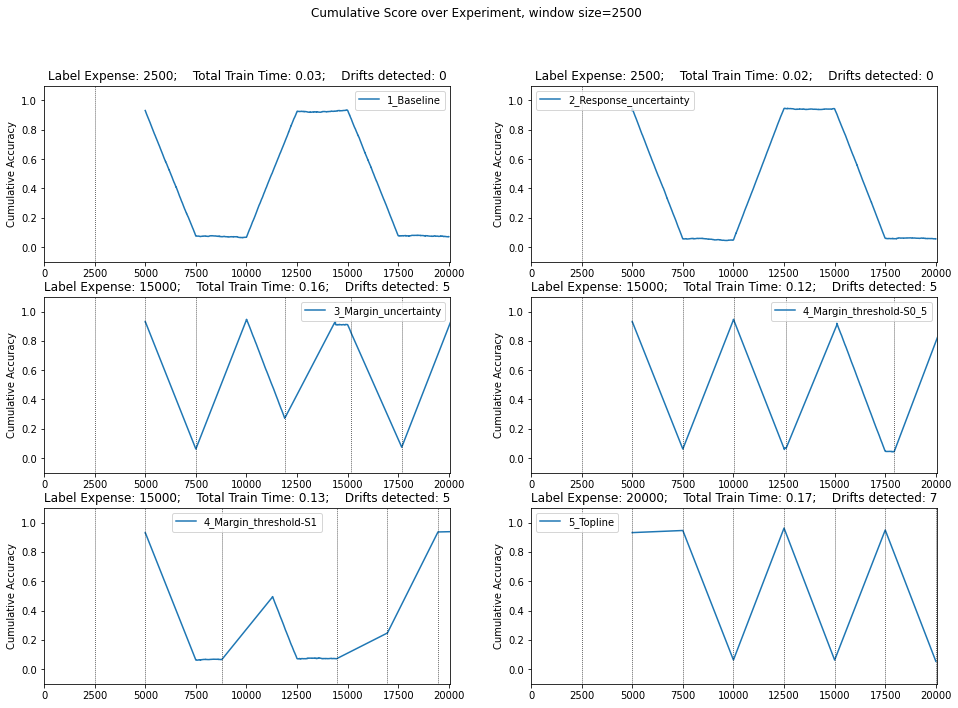

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.03,0.125,0,0,0,0,0.070800,0.000000
2_Response_uncertainty,0.02,0.125,0,5,0,5,0.056000,0.000000
3_Margin_uncertainty,0.16,0.750,5,4,3,2,0.959622,0.444444
4_Margin_threshold-S0_5,0.12,0.750,5,3,4,2,0.955782,0.250000
4_Margin_threshold-S1,0.13,0.750,5,4,4,3,0.944238,0.222222
5_Topline,0.17,1.000,7,1,6,0,0.053600,0.250000


Running experiments with window size = 3500


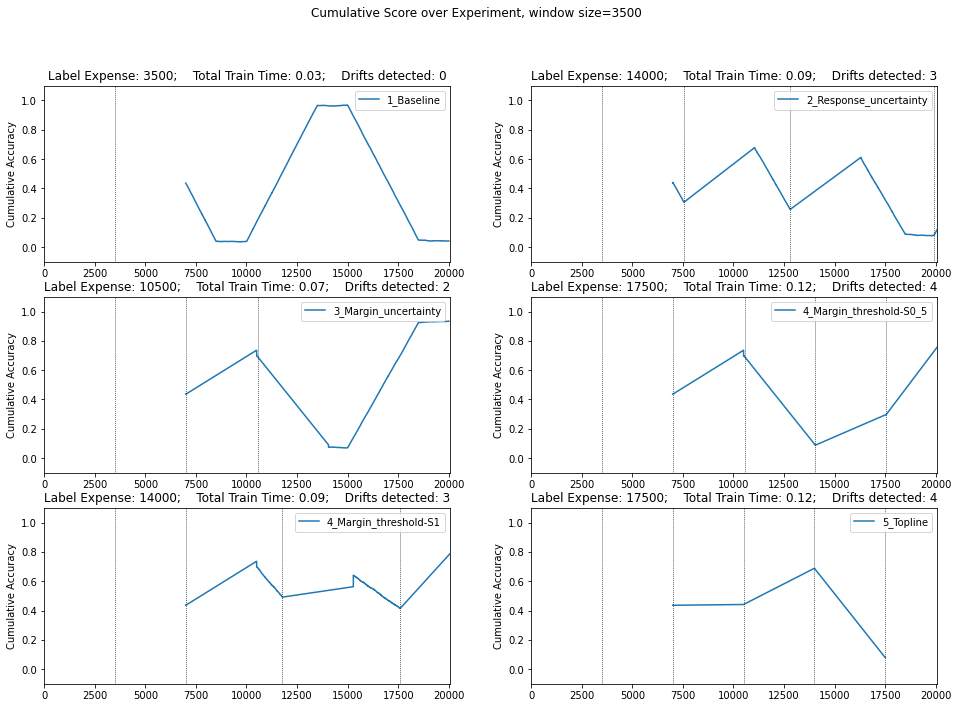

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.03,0.175,0,0,0,0,0.041200,0.000000
2_Response_uncertainty,0.09,0.700,3,4,3,4,0.947368,0.000000
3_Margin_uncertainty,0.07,0.525,2,4,1,3,0.933729,0.333333
4_Margin_threshold-S0_5,0.12,0.875,4,3,2,1,0.936786,0.571429
4_Margin_threshold-S1,0.09,0.700,3,3,2,2,0.946644,0.333333
5_Topline,0.12,0.875,4,2,2,0,0.078557,0.666667


In [9]:
# Run experiments
delete_csv=True
for size_w in [500, 1500, 2500, 3500]:
    # Define dataset
    name_ds = "_2_data_mixed_recurrente"
    dataset_2 = Dataset(name_ds, full_df=dataset_mixed_rec, column_mapping=column_mapping, window_size=size_w)
    # Run experiments
    print(f"Running experiments with window size = {dataset_2.window_size}")
    exps = define_run_exps(model, param_grid, dataset_2, delete_csv=delete_csv)
    delete_csv=False
    #Plot results
    fig, axs = plt.subplots(ncols=2, nrows=3, figsize = (16,11))
    axs = axs.flatten()
    i = 0
    for exp in exps:
        plot_experiment_error(exp, show_trainings=True, ax=axs[i])
        i+=1
    fig.suptitle(f"Cumulative Score over Experiment, window size={dataset_2.window_size}")
    plt.show()
    #plot_multiple_experiments(exps, change_points)
    display(aggregate_experiment_metrics(exps))

##### Inspección visual de resultados

Visualización de la distribución en las zonas detectadas como drift en Exp 2:


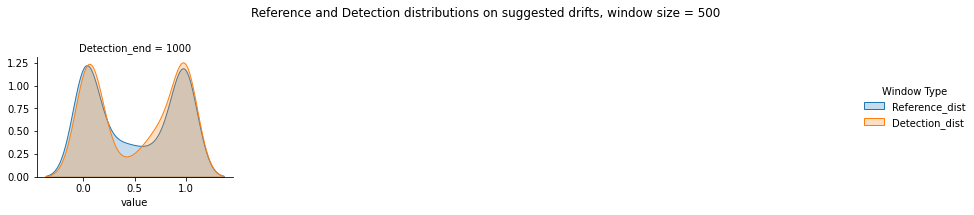

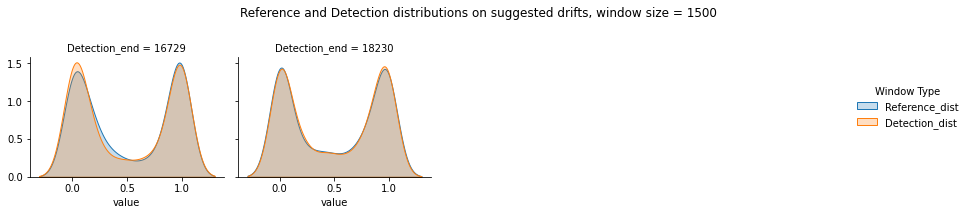

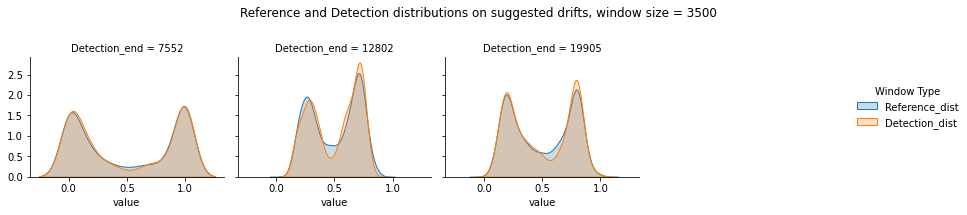

In [10]:
results_KS = pd.read_csv("./results/_2_data_mixed_recurrente_2_Response_uncertainty_results.csv", sep=",")

print("Visualización de la distribución en las zonas detectadas como drift en Exp 2:")
plot_KS_drift_distributions(results_KS,[500, 1500, 2500, 3500])

Visualización de la distribución del margen en las zonas detectadas como drift en Exp 3:


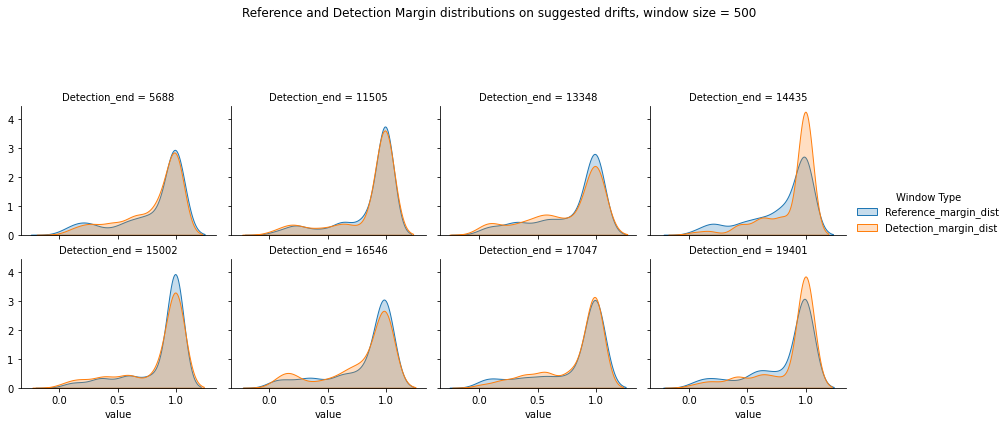

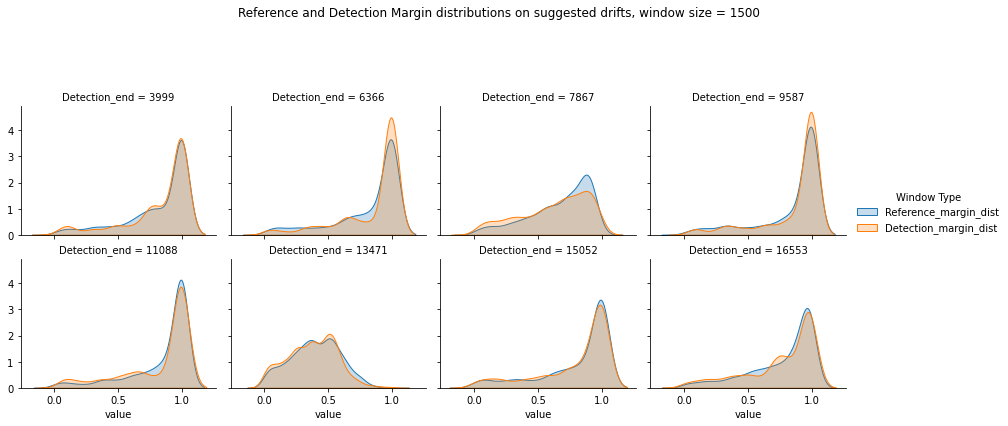

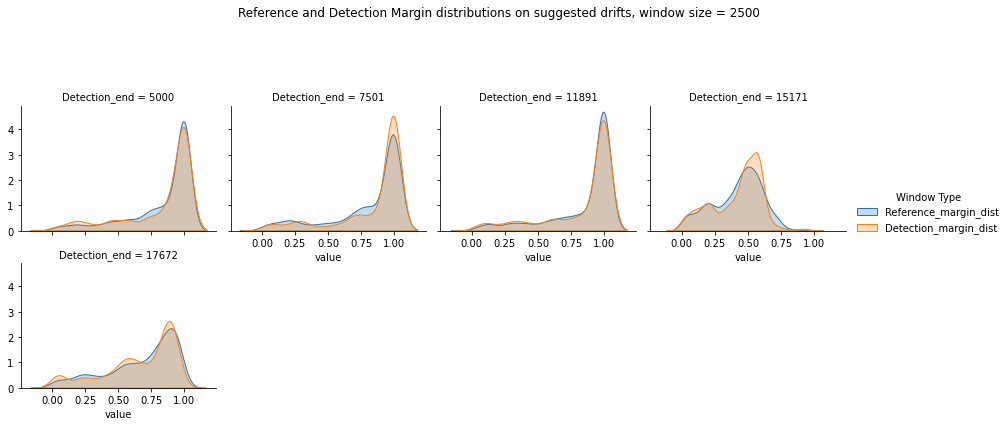

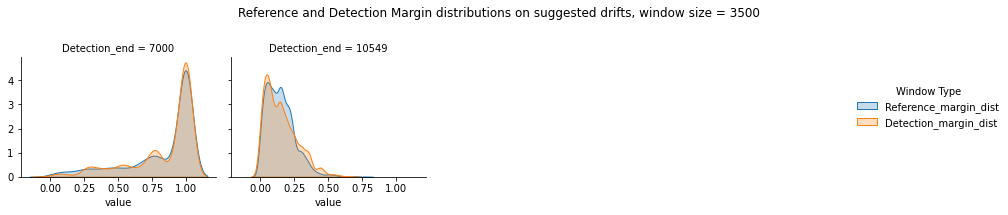

In [11]:
results_XS = pd.read_csv("./results/_2_data_mixed_recurrente_3_Margin_uncertainty_results.csv", sep=",", low_memory=False)

print("Visualización de la distribución del margen en las zonas detectadas como drift en Exp 3:")
plot_XS_drift_margin_distributions(results_XS, [500, 1500, 2500, 3500])

### Mixed - Gradual

In [12]:
# Load data
change_points = [9750]

column_mapping = {
    "target": "target",
    "int_features": ["v", "w"],
    "float_features": ["x", "y"],
}

dataset_mixed_grad = pd.read_csv("./datasets/_3_data_mixed_gradual.csv")
dataset_mixed_grad['v'].replace({True: 1, False: 0}, inplace = True)
dataset_mixed_grad['w'].replace({True: 1, False: 0}, inplace = True)

model = RandomForestClassifier(n_estimators=5, random_state=42, max_depth=5)
param_grid = {"clf__n_estimators": [5], "clf__max_depth": [5]}

Running experiments with window size = 500


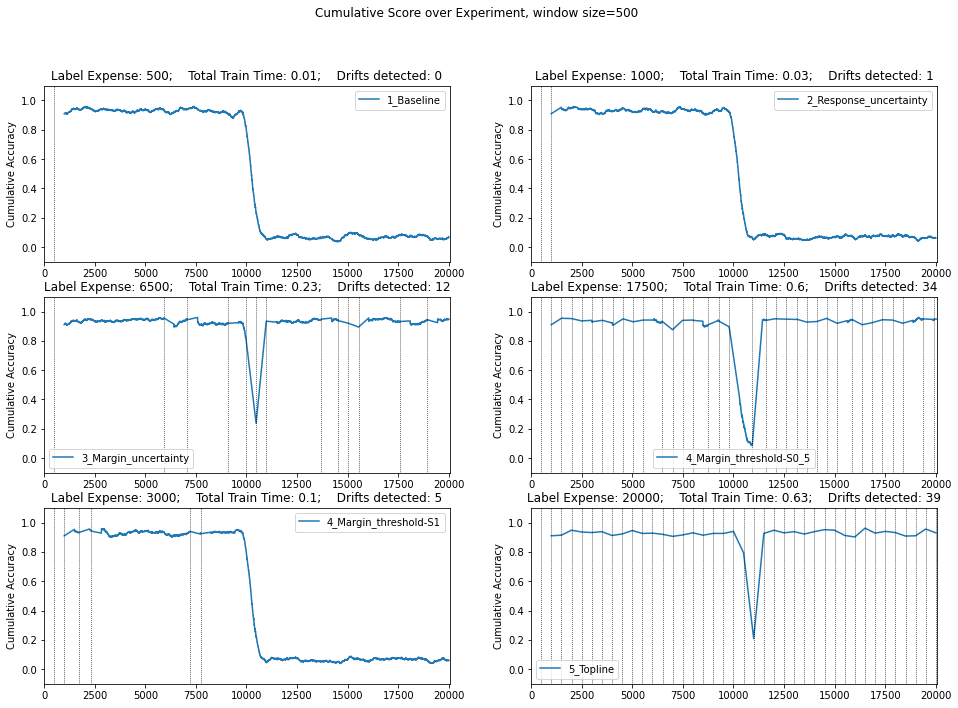

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.01,0.025,0,0,0,0,0.068000,0.000000
2_Response_uncertainty,0.03,0.050,1,3,1,3,0.062000,0.000000
3_Margin_uncertainty,0.23,0.325,12,2,11,1,0.948000,0.142857
4_Margin_threshold-S0_5,0.60,0.875,34,3,33,2,0.950617,0.054054
4_Margin_threshold-S1,0.10,0.150,5,3,5,3,0.060000,0.000000
5_Topline,0.63,1.000,39,2,37,0,0.930000,0.097561


Running experiments with window size = 1500


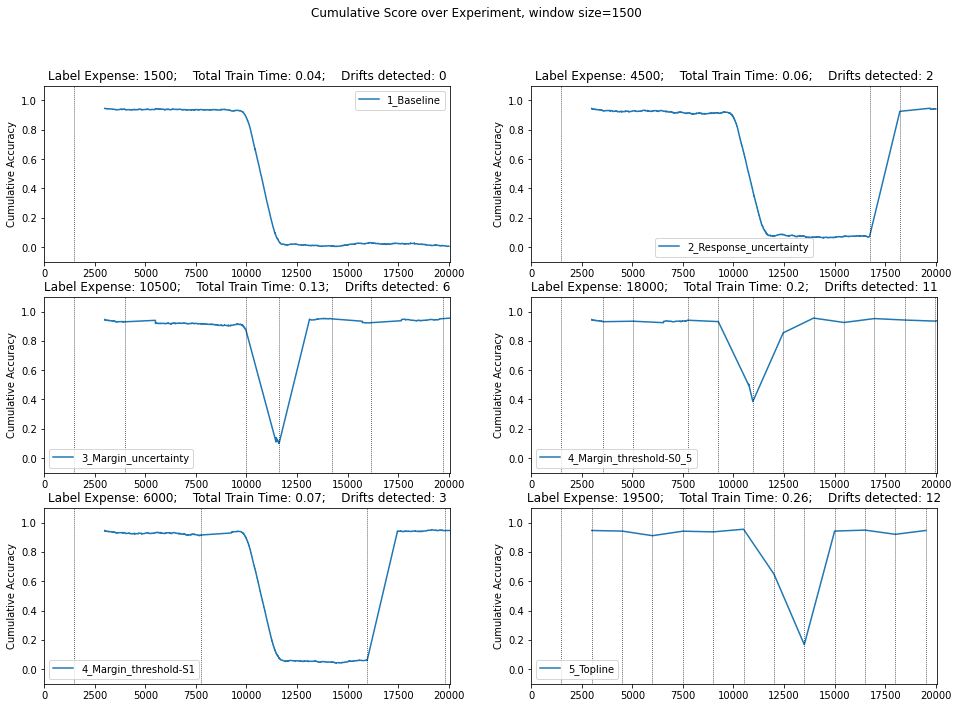

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.04,0.075,0,0,0,0,0.005200,0.000000
2_Response_uncertainty,0.06,0.225,2,4,2,4,0.942000,0.000000
3_Margin_uncertainty,0.13,0.525,6,2,6,2,0.967532,0.000000
4_Margin_threshold-S0_5,0.20,0.900,11,2,10,1,0.972222,0.153846
4_Margin_threshold-S1,0.07,0.300,3,3,3,3,0.947059,0.000000
5_Topline,0.26,0.975,12,1,11,0,0.946000,0.153846


Running experiments with window size = 2500


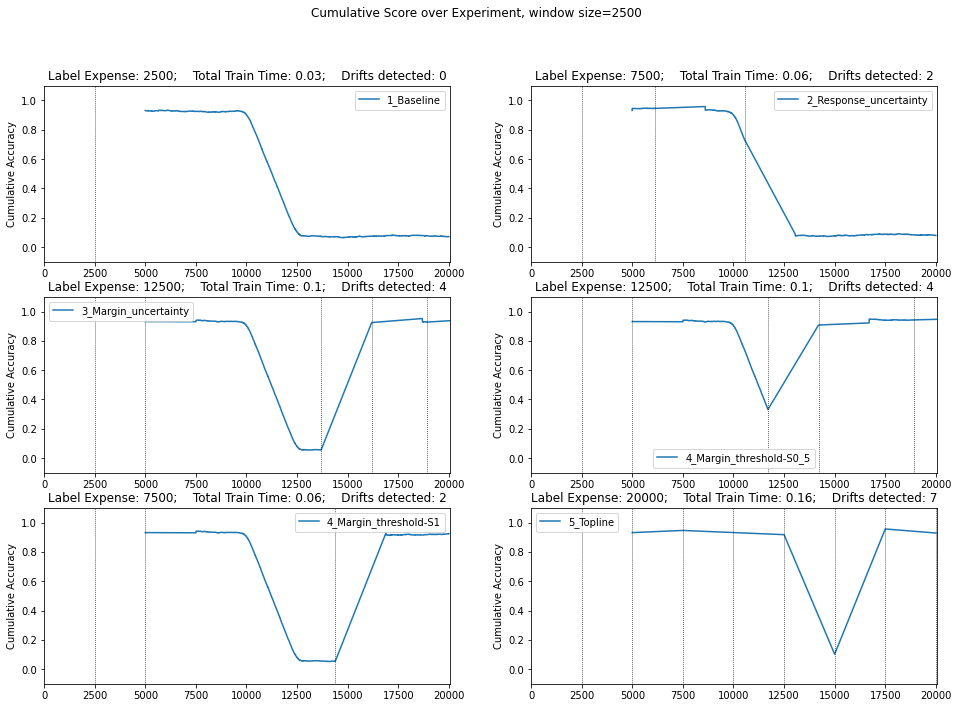

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.03,0.125,0,0,0,0,0.070800,0.000000
2_Response_uncertainty,0.06,0.375,2,2,2,2,0.079200,0.000000
3_Margin_uncertainty,0.10,0.625,4,2,4,2,0.949486,0.000000
4_Margin_threshold-S0_5,0.10,0.625,4,1,4,1,0.951774,0.000000
4_Margin_threshold-S1,0.06,0.375,2,2,2,2,0.924400,0.000000
5_Topline,0.16,1.000,7,2,5,0,0.928800,0.444444


Running experiments with window size = 3500


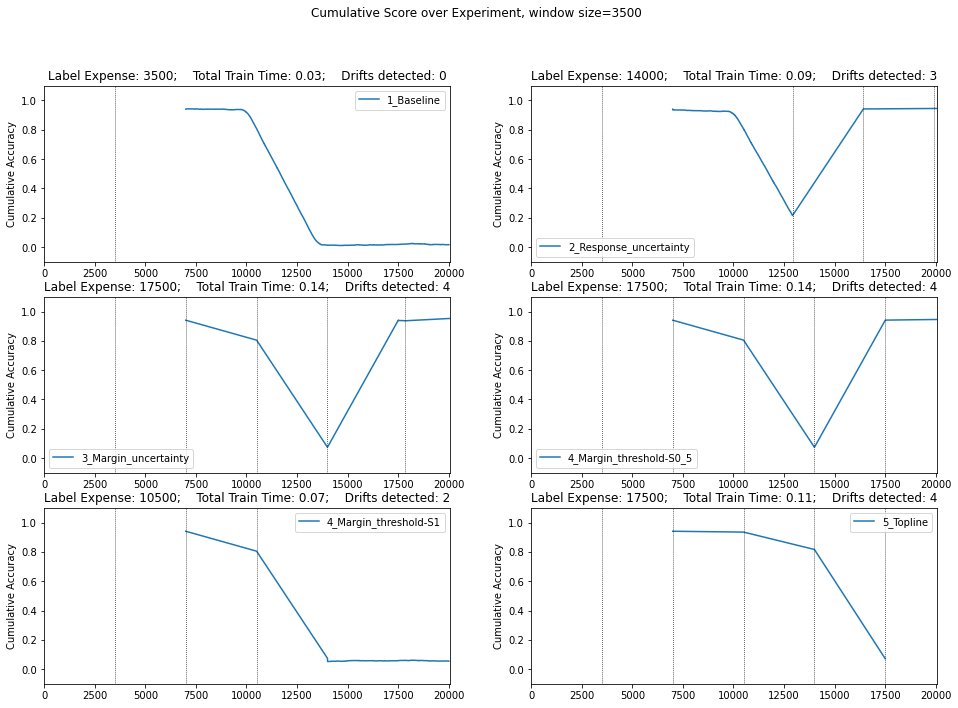

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.03,0.175,0,0,0,0,0.015957,0.000000
2_Response_uncertainty,0.09,0.700,3,2,2,1,0.949367,0.400000
3_Margin_uncertainty,0.14,0.875,4,2,3,1,0.962107,0.333333
4_Margin_threshold-S0_5,0.14,0.875,4,2,2,0,0.947537,0.666667
4_Margin_threshold-S1,0.07,0.525,2,2,1,1,0.054857,0.500000
5_Topline,0.11,0.875,4,1,3,0,0.071143,0.400000


In [13]:
# Run experiments
delete_csv=True
for size_w in [500, 1500, 2500, 3500]:
    # Define dataset
    name_ds = "_3_data_mixed_gradual"
    dataset_3 = Dataset(name_ds, full_df=dataset_mixed_grad, column_mapping=column_mapping, window_size=size_w)
    # Run experiments
    print(f"Running experiments with window size = {dataset_3.window_size}")
    exps = define_run_exps(model, param_grid, dataset_3, delete_csv=delete_csv)
    delete_csv=False
    #Plot results
    fig, axs = plt.subplots(ncols=2, nrows=3, figsize = (16,11))
    axs = axs.flatten()
    i = 0
    for exp in exps:
        plot_experiment_error(exp, show_trainings=True, ax=axs[i])
        i+=1
    fig.suptitle(f"Cumulative Score over Experiment, window size={dataset_3.window_size}")
    plt.show()
    #plot_multiple_experiments(exps, change_points)
    display(aggregate_experiment_metrics(exps))

##### Inspección visual de resultados

Visualización de la distribución en las zonas detectadas como drift en Exp 2:


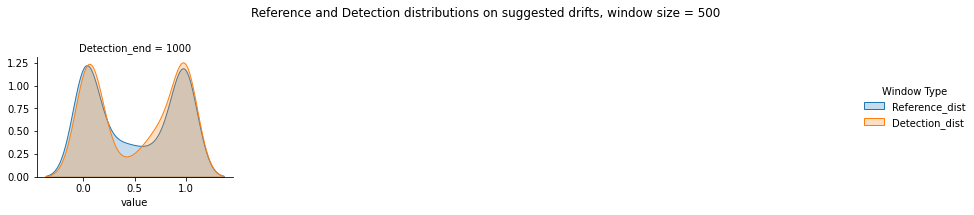

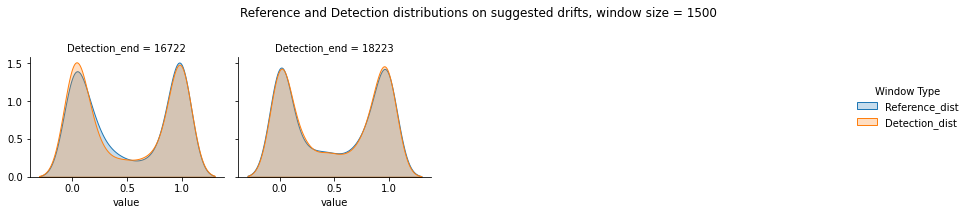

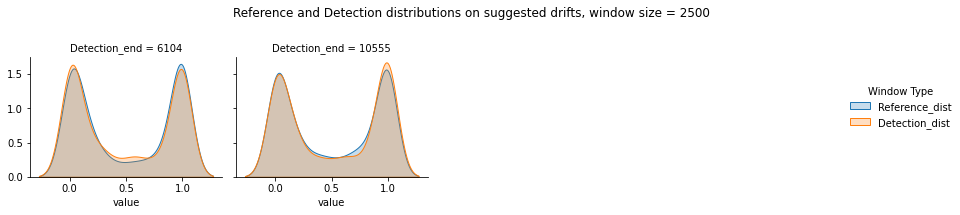

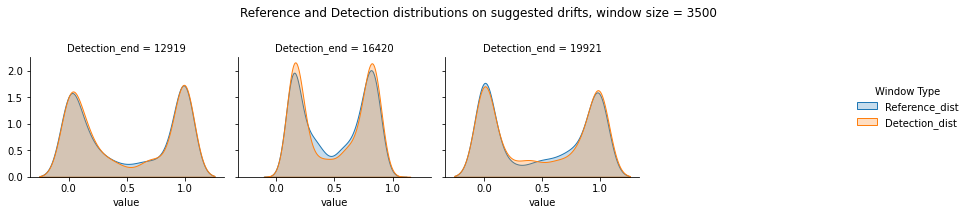

In [14]:
results_KS = pd.read_csv("./results/_3_data_mixed_gradual_2_Response_uncertainty_results.csv", sep=",")

print("Visualización de la distribución en las zonas detectadas como drift en Exp 2:")
plot_KS_drift_distributions(results_KS,[500, 1500, 2500, 3500])

Visualización de la distribución del margen en las zonas detectadas como drift en Exp 3:


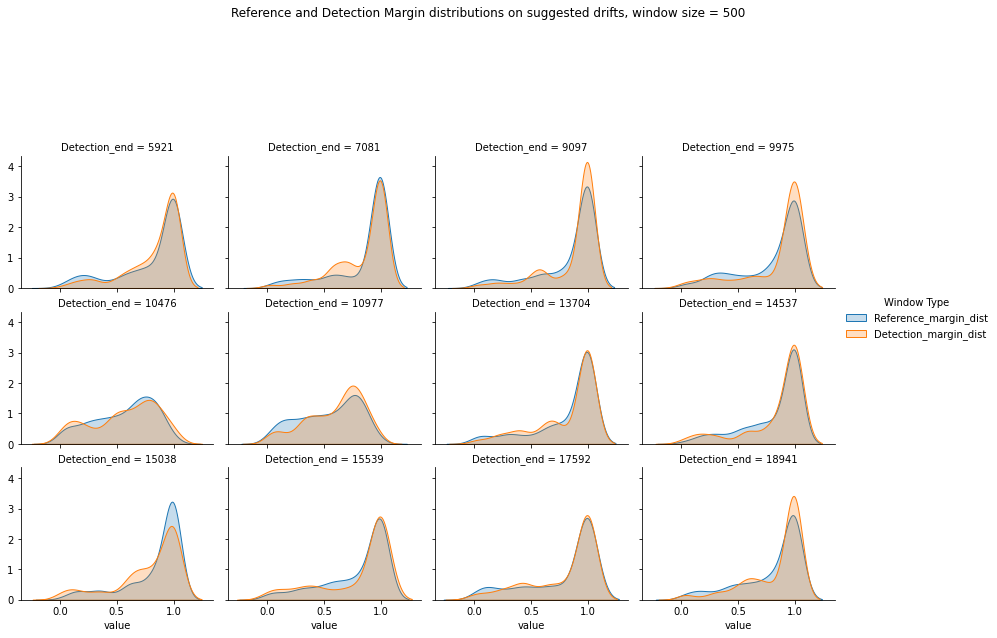

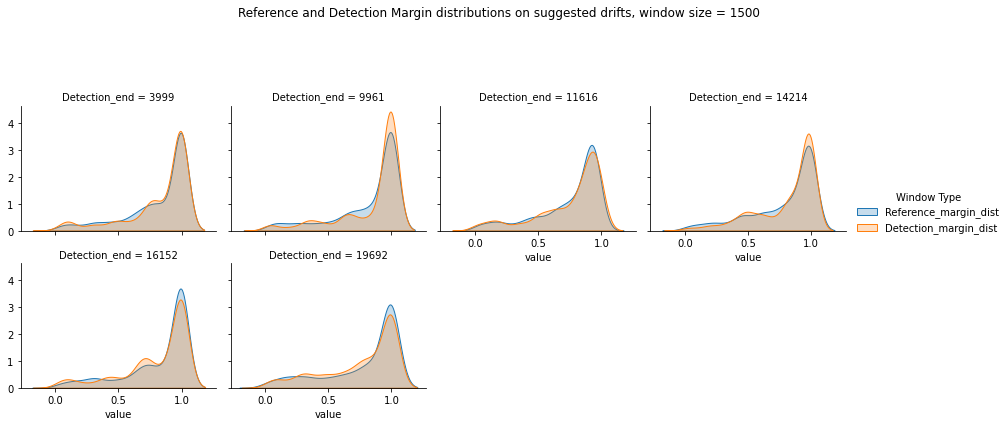

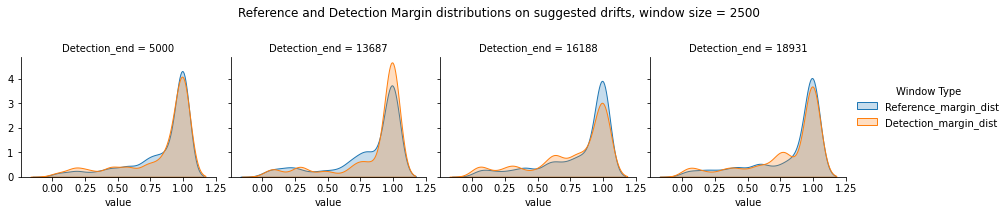

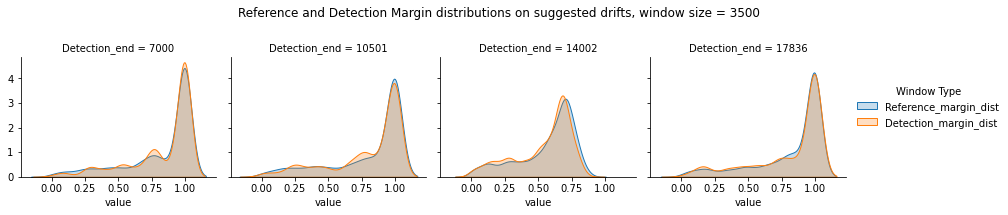

In [15]:
results_XS = pd.read_csv("./results/_3_data_mixed_gradual_3_Margin_uncertainty_results.csv", sep=",", low_memory=False)

print("Visualización de la distribución del margen en las zonas detectadas como drift en Exp 3:")
plot_XS_drift_margin_distributions(results_XS, [500, 1500, 2500, 3500])